Objectives

The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.

In [142]:
# Importing MySQL connector
import mysql.connector
# Importing Pandas as pd
import pandas as pd
# Importing the Pyplot sub-module of Matplotlib library as plt
import matplotlib.pyplot as plt
# Importing Seaborn as sns
import seaborn as sns
# Importing numpy as np
import numpy as np

In [143]:
# connecting to MySQL
connection= mysql.connector.connect(
user='root',
password='5678',
host='localhost',
database='ecommerce'
)

In [144]:
#create a connection cursor object to execute SQL statements
cursor=connection.cursor()

In [145]:
# Executing query data from the 'customer' table
cursor.execute('SELECT * FROM customer')

# Creating DataFrame for Customer table
customer_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Executing query data from the 'product' table 
cursor.execute('SELECT * FROM product')

# Creating DataFrame for Product table
product_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Executing query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')

# Creating DataFrame for Order_details table
order_details_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

cursor.close()
connection.close()

In [146]:
# Displaying the first 5 rows of Customer Table
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [147]:
# Displaying the first 5 rows of Product Table 
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [148]:
# Displaying the first 5 rows of Order_details Table
order_details_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [149]:
customer_df.shape

(62, 7)

In [150]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


Through the above information we can see the number of columns and its data types,where customer_id, name, city, email, phone_no, address are object type data and pin_code is int64 type data.

In [151]:
customer_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Through the above information we can see that there are no null values in any column.

In [152]:
customer_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [153]:
customer_df.describe(include='object').T

,count,unique,top,freq
customer_id,62,62,C1001,1
name,62,39,Ava,4
city,62,4,Tokyo,22
email,62,52,henry@gmail.com,3
phone_no,62,26,1234567890,11
address,62,57,oo.pp.road,2


In [154]:
customer_df.isnull().value_counts()

customer_id  name   city   email  phone_no  address  pin_code
False        False  False  False  False     False    False       62
Name: count, dtype: int64

In [155]:
product_df.shape

(61, 7)

In [156]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


Through the above information we can see the number of columns and its data types,where product_id, product_name, category, sub_category are object type data.original_price and selling_price are float64 type data.stock is int64 type data.

In [157]:
product_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Through the above information we can see that there are no null values in any column.

In [158]:
product_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [159]:
product_df.describe(include='object').T

,count,unique,top,freq
product_id,61,61,P102,1
product_name,61,43,Tablet,4
category,61,4,Electronics,32
sub_category,61,22,Electronics,20


All entries have unique product IDs, and the most common product ID is 'P102.':There are 43 unique product names, with 'Tablet' being the most frequent product name, occurring 4 times.y:There are 4 unique categories, and 'Electronics' is the most prevalent category, appearing 32 timesry:The dataset includes 22 unique sub-categories, with 'Electronics' being the most common sub-category, occurring 20 times.

In [160]:
product_df.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

Through the above information we can see that there are no missing values in any of the columns of the `product_df` DataFrame.
All entries are marked as `False`, meaning that every cell in the DataFrame has a valid (non-null) value
This is a positive sign for data integrity, as the dataset is complete with no missing information in any of its columns.

In [161]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [162]:
#Replacing the 'furniture' column into the 'Furniture' column
product_df['category']= product_df['category'].replace('furniture','Furniture')

In [163]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

In [164]:
order_details_df.shape

(76, 8)

In [165]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


Through the above information we can see the number of columns and its data types,where order_id is int64 type data.customer_id, product_id, payment_mode and order_status is object type data.quantity and total_price are float64 type data.And order_date is datetime64[ns] type data.

In [166]:
order_details_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

Through the above information we can see that there are no null values in any column.

In [167]:
order_details_df.duplicated().sum()

0

In [168]:
order_details_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


In [169]:
order_details_df.describe(include='object').T

,count,unique,top,freq
customer_id,76,59,C1013,3
product_id,76,58,P102,3
payment_mode,76,2,Online,43
order_status,76,6,Delivered,27


In [170]:
order_details_df.isnull().value_counts()

order_id  customer_id  product_id  quantity  total_price  payment_mode  order_date  order_status
False     False        False       False     False        False         False       False           76
Name: count, dtype: int64

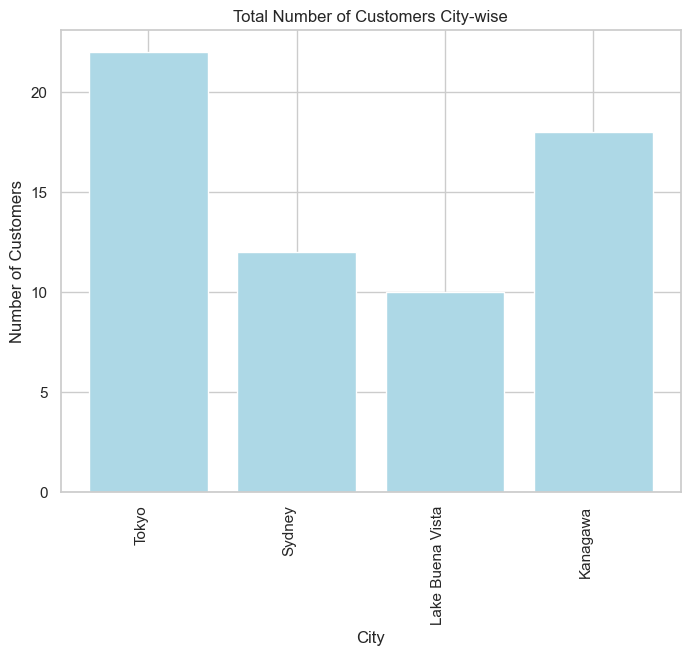

In [171]:
#Total number of customers city-wise
customer_count_citywise = cust_df.groupby('city')['customer_id'].nunique().reset_index().sort_values(by='city',ascending=False)

# Creating a bar plot using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(customer_count_citywise['city'], customer_count_citywise['customer_id'], color='lightblue')
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Showing the plot
plt.show()

In the above bar graph,we can see the total number of customers in each city. By comparing the heights of the bars, we can see Tokyo city has highest customers,more than 20 customers followed by Kanagawa with number of customers in between 15-20. Then Sydney took the third place with number of customers in between 10-15. Atlast Lake Buena Vista has lowest number of customers which is 10.  

C:\Users\PAVEL\AppData\Local\Temp\ipykernel_5424\357231403.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='order_frequency', data=top_customers, palette='viridis')


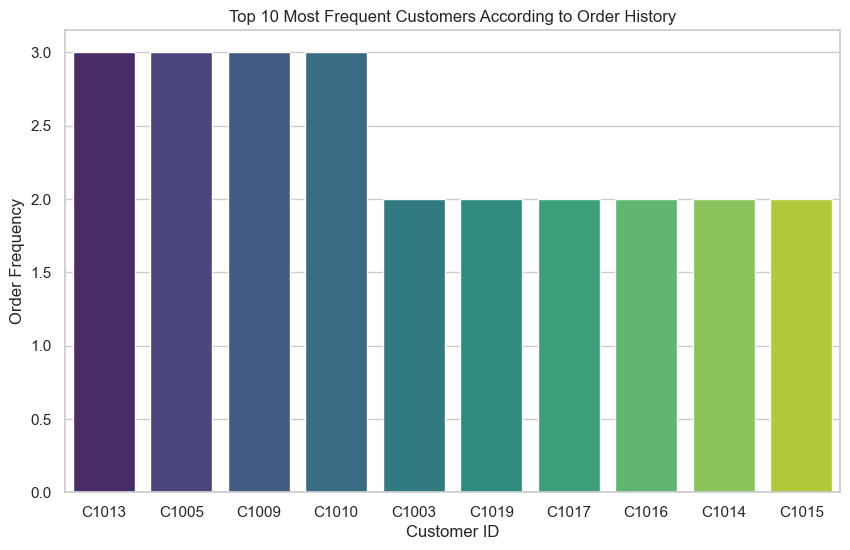

In [172]:
# Identifying the most frequent customers based on their order history
customer_order_frequency = order_df.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order_frequency.columns = ['customer_id', 'order_frequency']
top_customers = customer_order_frequency.sort_values(by='order_frequency', ascending=False).head(10)

# Setting the style for the plot 
sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='order_frequency', data=top_customers, palette='viridis')
plt.title('Top 10 Most Frequent Customers According to Order History')
plt.xlabel('Customer ID')
plt.ylabel('Order Frequency')

# Showing the plot
plt.show()

In the above bar graph,we can see that Customer ID C1013,C1005,C1009,C1010 has the highest order frequency of 3.0. And C1003,C1019,C1017,C1016,C1014,C1015 has order frequency of 2.0.

C:\Users\PAVEL\AppData\Local\Temp\ipykernel_5424\1527028746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pin_code', data=cust_df, palette='muted', order=cust_df['pin_code'].value_counts().index)


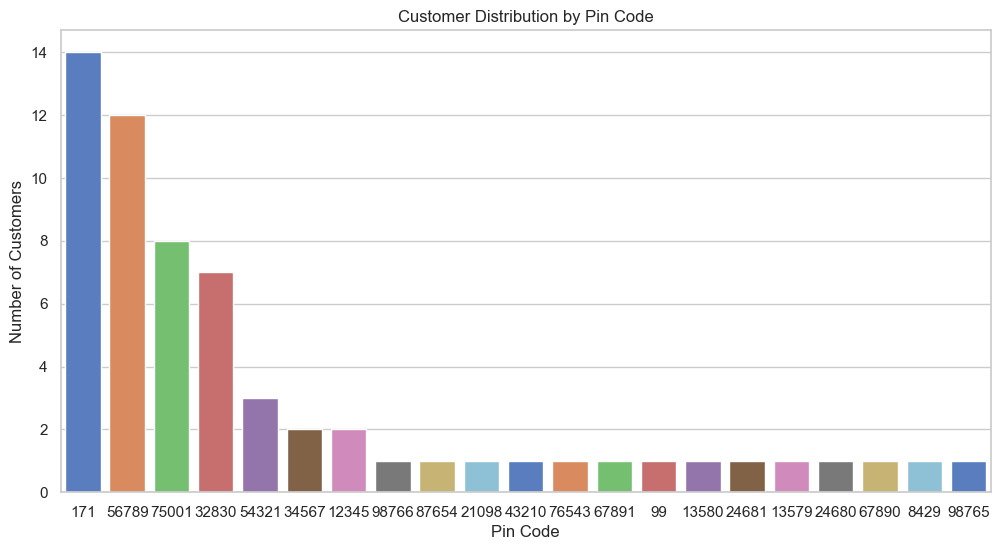

In [173]:
sns.set(style="whitegrid")

# Bar plot for customer distribution by pin code
plt.figure(figsize=(12, 6))
sns.countplot(x='pin_code', data=cust_df, palette='muted', order=cust_df['pin_code'].value_counts().index)
plt.title('Customer Distribution by Pin Code')
plt.xlabel('Pin Code')
plt.ylabel('Number of Customers')

# Showing the plot
plt.show()

In the above bar graph,we can see that the pincode 171 has the maximum number of customers and tThe pincode from 98766 to 98765 have the least number of customers.

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64


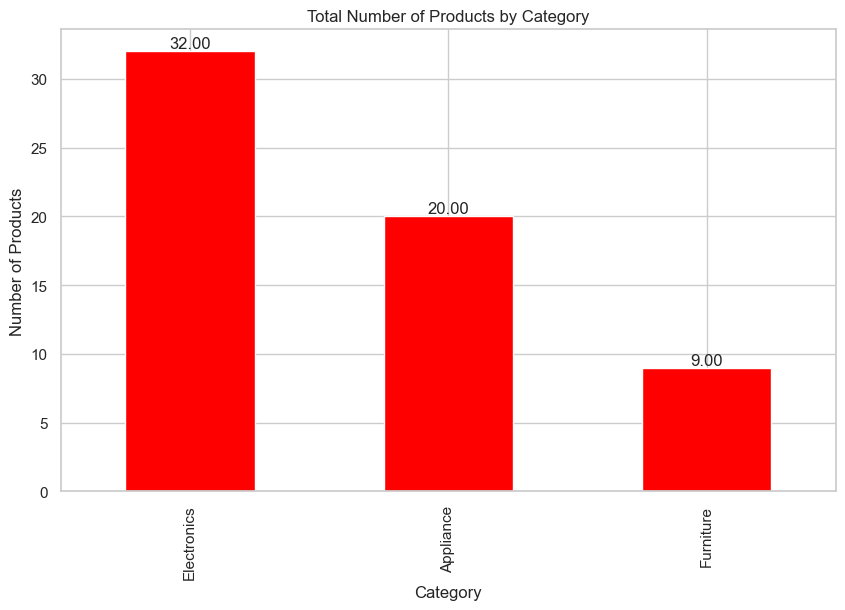

In [174]:
# Determine the total number of products available by category
products_by_category = product_df['category'].value_counts()

# Printing the value
print(products_by_category )

# Plotting the bar graph
plt.figure(figsize=(10, 6))
products_by_category.plot(kind='bar', color='red')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')

# Adding data labels to the bar plot
for index, value in enumerate(product_df['category'].value_counts()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Showing the plot
plt.show()

In the above bar graph,we can see that Electronics has the highest number of products which is 32 followed by Appliances with 20 products and Furniture has the lowest number of products which is 9.

sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Chairs            2
Lamps             2
Accessories       2
Tablets           2
TVs               1
chairs            1
Tables            1
computer          1
Cameras           1
Desks             1
Printers          1
Consoles          1
Mobiles           1
phone             1
Furniture         1
Photography       1
Sofas             1
Name: count, dtype: int64


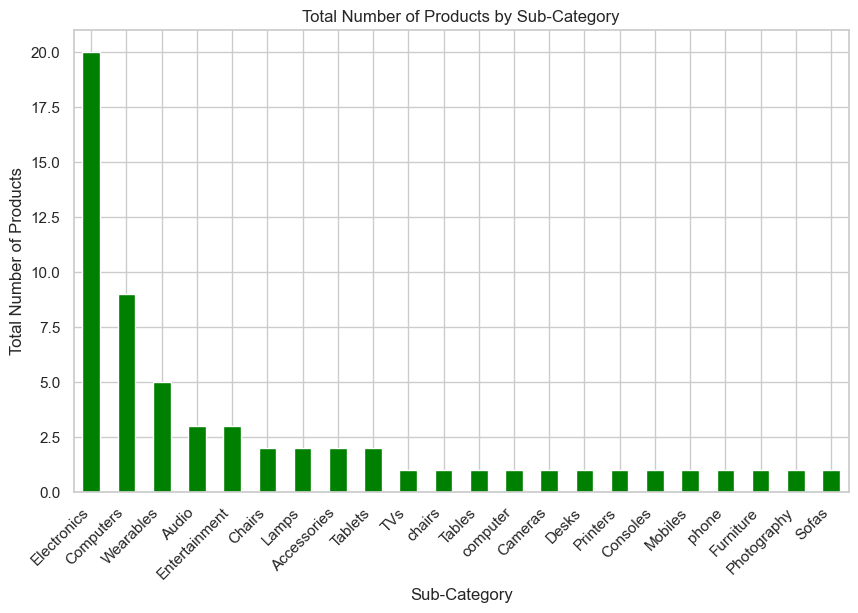

In [175]:
# Calculate the total number of products by sub-category
products_by_category = product_df['sub_category'].value_counts()
print(products_by_category)

# Set up the Matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the total number of products by category
products_by_category.plot(kind='bar', color='green')

# Adding labels and title
plt.title('Total Number of Products by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Number of Products')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In the above bar graph,we can see that out of all the sub-category, Electronics has the highest number of products followed by Computer with total number of products in between 7.5-10. From TVs to Sofas, all these sub-categories have lowest number of products.

In [176]:
# Setting a threshold for low stock 
low_stock_threshold = 20

# Filtering products with low stock
low_stock_products = product_df[product_df['stock'] < low_stock_threshold]

# Sorting products by stock level in ascending order
low_stock_products = low_stock_products.sort_values(by='stock', ascending=True)

# Taking the top 9 products
top_low_stock_products = low_stock_products.head(9)
print(top_low_stock_products)

   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    Furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
46       P148               Tablet  Electronics    Computers         30000.0   
10       P112                chair    Furniture       chairs          1000.0   
39       P141              Printer  Electronics    Computers         12000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
46        25000.0     10  
10          800.0     10  
39        10000.0     10  
30        45000.0     10  
12        

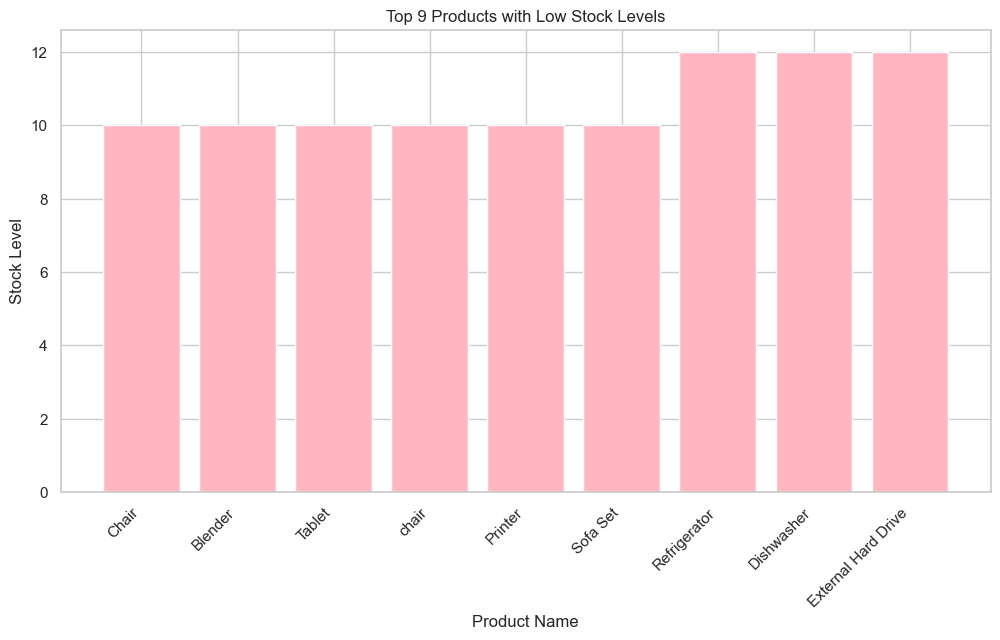

In [177]:
# Set up the Matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 9 products with low stock levels
plt.bar(top_low_stock_products['product_name'], top_low_stock_products['stock'], color='lightpink')

# Adding labels and title
plt.title('Top 9 Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.show()

In the above bar graph,Refrigerator,Dishwasher and  External Hard Drive have the stock level of 12. Chair,Blender,Tablet,Printer and Sofa Set has the lowest stock level which is 10.

Average Price 17774.62262295082
Maximum Price 70000.0
Minimum Price 450.0


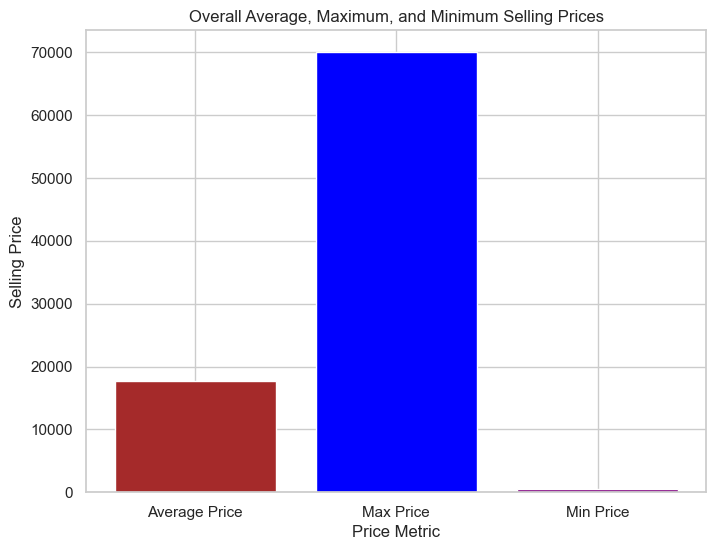

In [178]:
# Calculate overall average, maximum, and minimum selling prices
overall_average_price = product_df['selling_price'].mean()
overall_max_price = product_df['selling_price'].max()
overall_min_price = product_df['selling_price'].min()

print("Average Price",overall_average_price)
print("Maximum Price",overall_max_price)
print("Minimum Price",overall_min_price)
# Visualize the results using a bar chart
plt.figure(figsize=(8, 6))

plt.bar(['Average Price', 'Max Price', 'Min Price'], [overall_average_price, overall_max_price, overall_min_price], color=['brown', 'blue', 'purple'])
plt.xlabel('Price Metric')
plt.ylabel('Selling Price')
plt.title('Overall Average, Maximum, and Minimum Selling Prices')

# Showing the plot
plt.show()

In the above bar graph,The maximum selling price is 70000.The average selling price is 17774.62262295082 and the minimum selling price is 450.

C:\Users\PAVEL\AppData\Local\Temp\ipykernel_5424\1430985928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product_name', data=top_selling_products, palette='viridis')


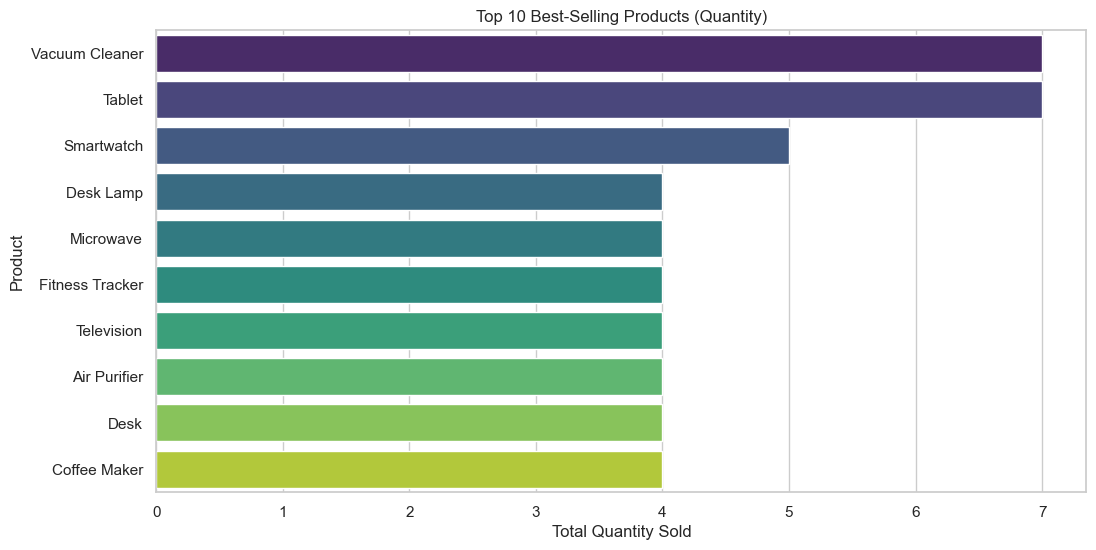

In [179]:
# Calculating the total quantity sold per product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort products by total quantity sold in descending order
top_selling_products = product_quantity.sort_values(by='quantity', ascending=False).head(10)

# Visualize the top 10 best-selling products based on quantity using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='product_name', data=top_selling_products, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products (Quantity)')

# Showing the plot
plt.show()

In the above bar graph,Vacuum Cleaner and Tablet are the best selling products followed by Smartwatch and the rest products having the sell of 4 each.

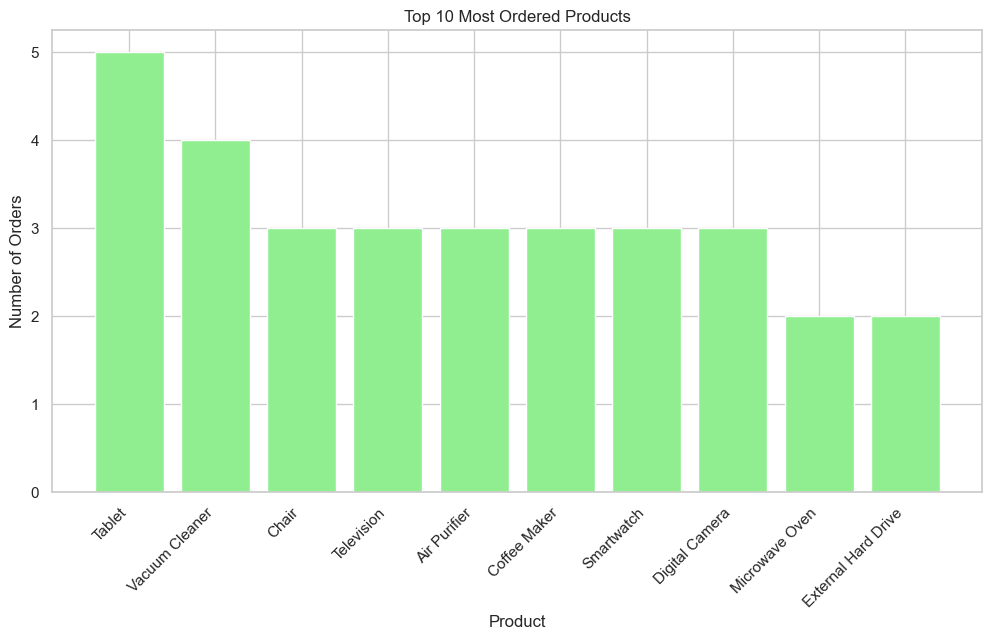

In [180]:
# Calculating the number of times each product is ordered
product_order_counts = prod_ord_df['product_name'].value_counts().reset_index()
product_order_counts.columns = ['product_name', 'order_count']

# Sorting products by order count in descending order
top_products = product_order_counts.head(10)

# Visualizing the top 10 most ordered products
plt.figure(figsize=(12, 6))
plt.bar(top_products['product_name'], top_products['order_count'], color='lightgreen')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Products')
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.show()

In the above bar graph,Tablet got the highest number of orders followed by Vacuum Cleaner.From Chair to Digital Camera got the same number of orders. Microwave Oven and External Hard Drive got the lowest number of orders.

C:\Users\PAVEL\AppData\Local\Temp\ipykernel_5424\804707880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=order_df, palette='Set3')


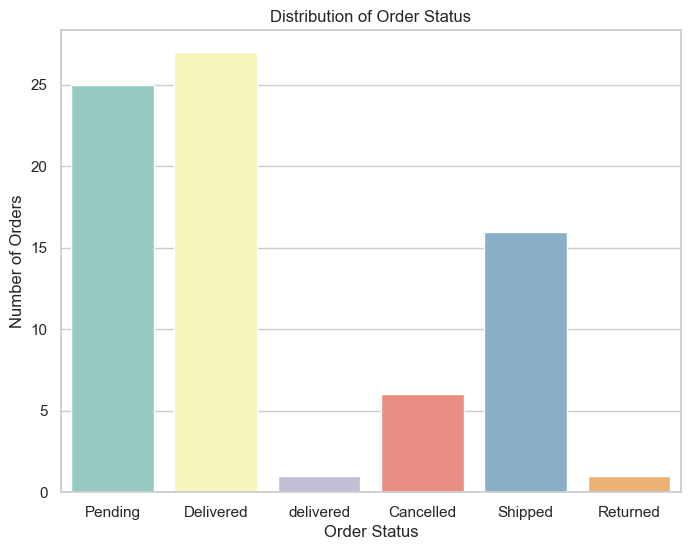

In [181]:
# Visualizing the distribution of order statuses
plt.figure(figsize=(8, 6))
sns.countplot(x='order_status', data=order_df, palette='Set3')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Status')

# Showing the plot
plt.show()

In the above bar graph,Most of the orders have been delivered.
25 orders are in pending state
Orders within the range of 15-20 have been shippe.
Orders within the range 5-10 have been cancelld.
Returned Orders are the least in the plot.

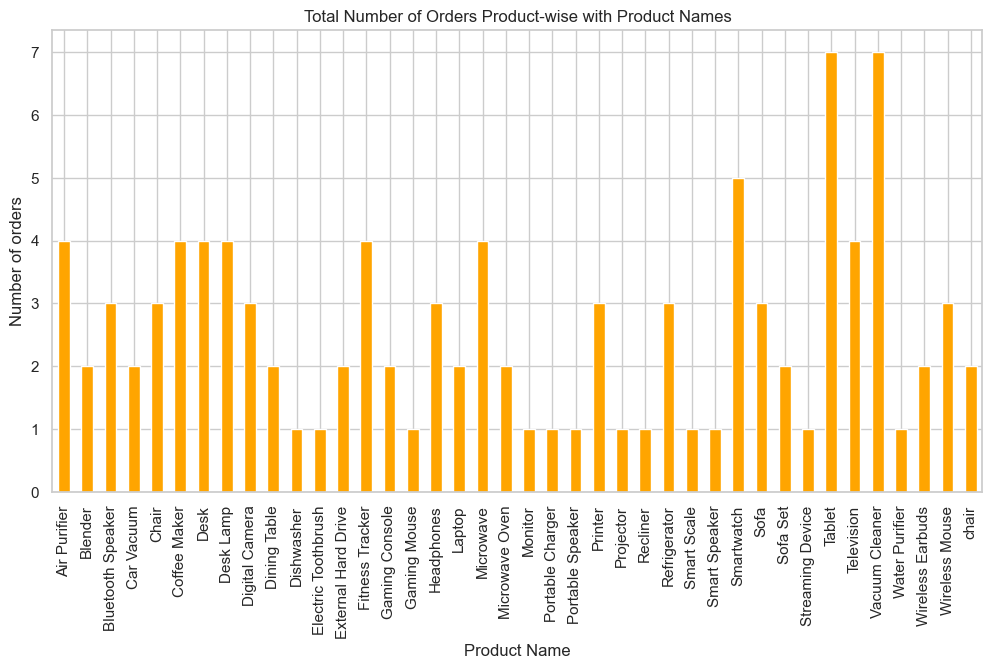

In [182]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_details_df, product_df, on='product_id', how='left')

# Identify the top 10 best-selling products
top_selling_products = merged_df.groupby('product_name')['quantity'].sum()
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='orange')
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)

# Showing the plot
plt.show()

The bar plot illustrates the total products based on the number of orders, providing a snapshot of the most frequently purchased items.
Tablet and Vacuum cleaner exhibit the highest demand, with Product smartwatch closely following.
The visualization aids in identifying popular products, offering valuable insights for inventory management and marketing strategies to capitalize on customer preferences and optimize stock levels.

In [183]:
# Group by 'product_name' and calculate total revenue for each product
product_revenue = prod_ord_df.groupby('product_name')['total_price'].sum().reset_index()

# Sorting the products based on total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='total_price', ascending=False)

# Selecting the top 10 products
top_10_products = product_revenue_sorted.head(10)
print(top_10_products)

      product_name  total_price
33          Tablet     187000.0
34      Television     164000.0
17          Laptop     110000.0
31        Sofa Set      90000.0
6             Desk      74000.0
35  Vacuum Cleaner      72000.0
14  Gaming Console      70000.0
9     Dining Table      70000.0
29      Smartwatch      68000.0
0     Air Purifier      64000.0


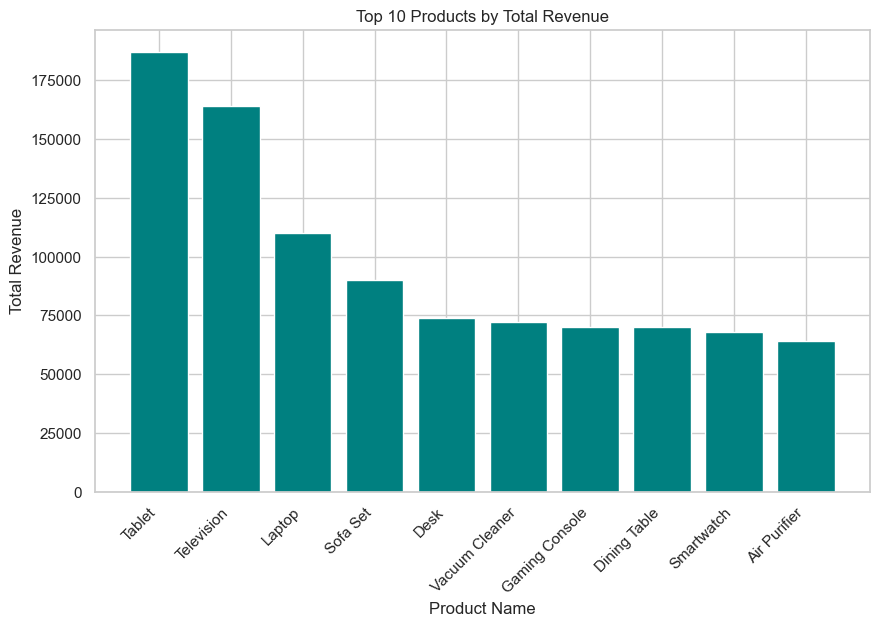

In [184]:
# Visualizing the results using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_name'], top_10_products['total_price'], color='teal')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.show()

In the above bar graph, Tablet got the highest revenue followed by Television with the second highest revenue.Air Purifier got the lowest revenue.

In [185]:
# Calculate total revenue
total_revenue = prod_ord_df['total_price'].sum()
print('Total Revenue',total_revenue)

Total Revenue 1586400.0


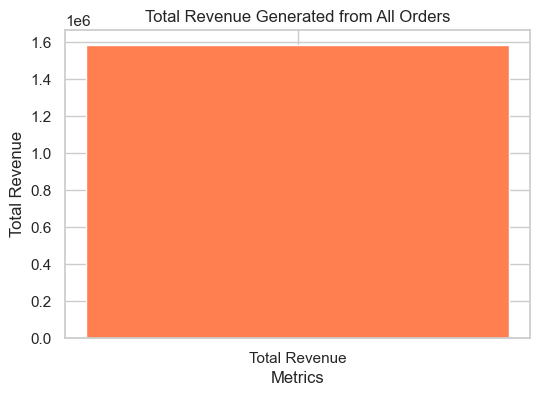

In [186]:
# Visualizing the results using a bar plot 
plt.figure(figsize=(6, 4))
plt.bar(['Total Revenue'], [total_revenue], color='coral')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from All Orders')

# Showing the plot
plt.show()

The total revenue generated from all orders is between Rs 1.4 lakhs and Rs 1.6 lakhs.

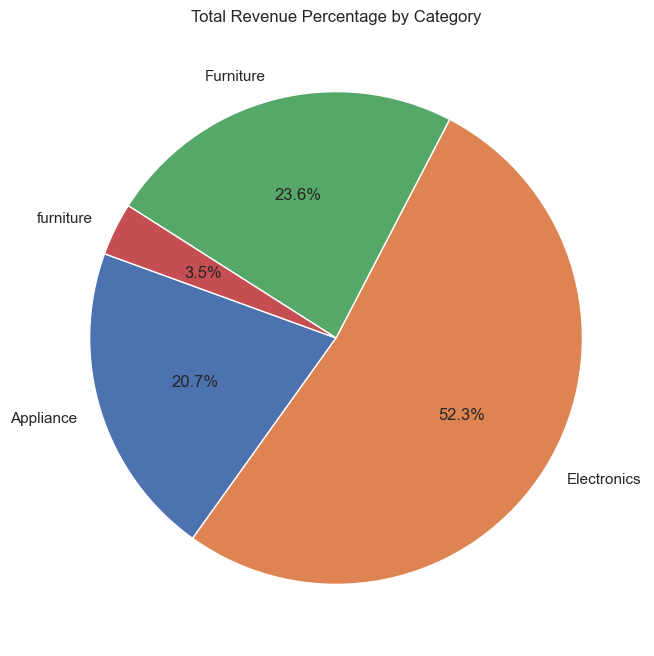

In [189]:
# Group by 'category' and calculate total revenue for each category
category_revenue = prod_ord_df.groupby('category')['total_price'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue['total_price'], labels=category_revenue['category'], autopct='%1.1f%%', startangle=160)
plt.title('Total Revenue Percentage by Category')

# Showing the plot
plt.show()

In [190]:
# Calculating profit for each product
prod_ord_df['profit'] = prod_ord_df['selling_price'] - prod_ord_df['original_price']

# Group by 'product_name' and calculate total profit for each product
product_profit = prod_ord_df.groupby('product_name')['profit'].sum().reset_index()

# Sorting the products based on total profit in descending order
product_profit_sorted = product_profit.sort_values(by='profit', ascending=False)

# Selecting the top 10 products 
top_profitable_products = product_profit_sorted.head(10)
print(top_profitable_products)

        product_name  profit
1            Blender  -100.0
39             chair  -400.0
15      Gaming Mouse  -500.0
22  Portable Speaker  -500.0
27       Smart Scale  -500.0
3         Car Vacuum -1000.0
38    Wireless Mouse -1000.0
37  Wireless Earbuds -1000.0
21  Portable Charger -1000.0
32  Streaming Device -1000.0


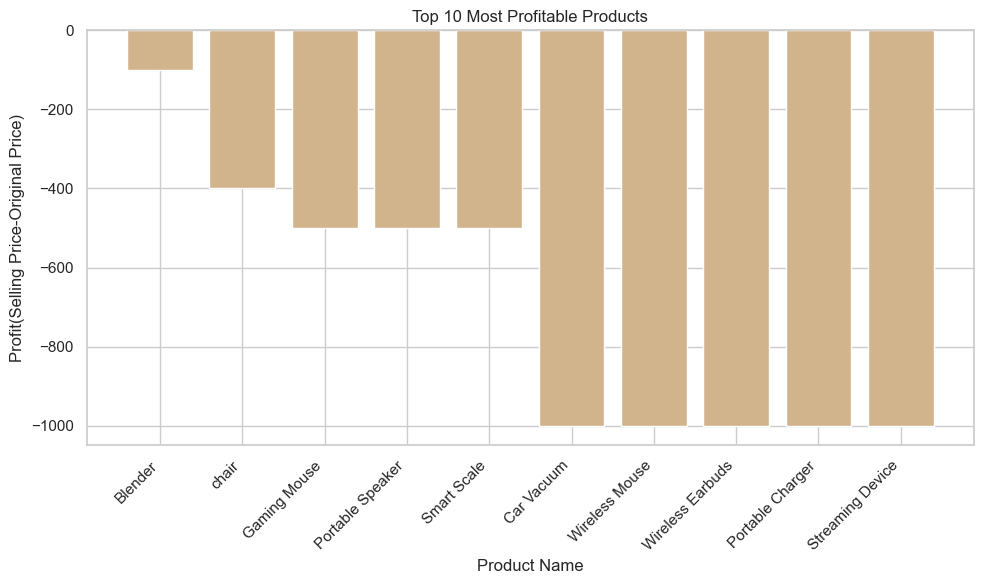

In [194]:
# Visualizing the results using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_profitable_products['product_name'], top_profitable_products['profit'], color='tan')
plt.xlabel('Product Name')
plt.ylabel('Profit(Selling Price-Original Price)')
plt.title('Top 10 Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

Blender is the only product from which profit had been made.The products that faced loss are Car Vacuum, Wireless Mouse, Wireless Earbuds, Portable Charger and Streaming Device.

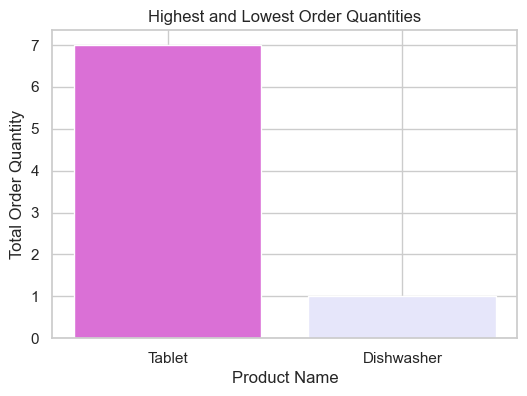

In [211]:
# Group by 'product_name' and calculate total order quantity for each product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Finding product with the highest order quantity
max_quantity_product = product_quantity.loc[product_quantity['quantity'].idxmax()]

#Finding product with the lowest order quantity
min_quantity_product = product_quantity.loc[product_quantity['quantity'].idxmin()]

# Visualizing the results for the highest and lowest order quantities using a bar plot
plt.figure(figsize=(6, 4))
plt.bar([max_quantity_product['product_name'], min_quantity_product['product_name']],
        [max_quantity_product['quantity'], min_quantity_product['quantity']], color=['orchid', 'lavender'])
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.title('Highest and Lowest Order Quantities')

# Showing the plot
plt.show()

Tablet stands with highest order quantity  and Dishwasherstands with lowest order quantity. 

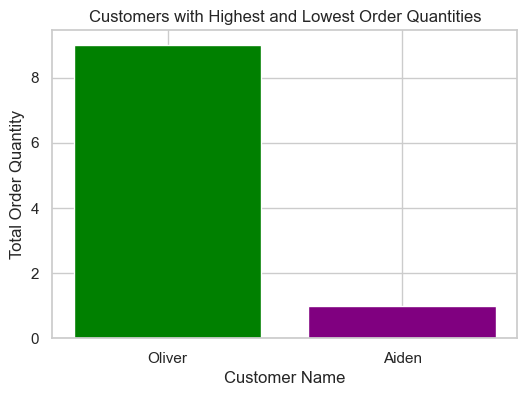

In [202]:
# Group by 'name' and calculate total order quantity for each customer
customer_quantity = cust_ord_df.groupby('name')['quantity'].sum().reset_index()

# Finding customer with the highest order quantity
max_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmax()]

# Finding customer with the lowest order quantity
min_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmin()]

# Visualizing the results for the highest and lowest order quantities using a bar plot
plt.figure(figsize=(6, 4))
plt.bar([max_quantity_customer['name'], min_quantity_customer['name']],
        [max_quantity_customer['quantity'], min_quantity_customer['quantity']], color=['green', 'purple'])
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.title('Customers with Highest and Lowest Order Quantities')

# Showing the plot
plt.show()

Oliver stands with highest order quantity and Aiden stands with lowest order quantity.

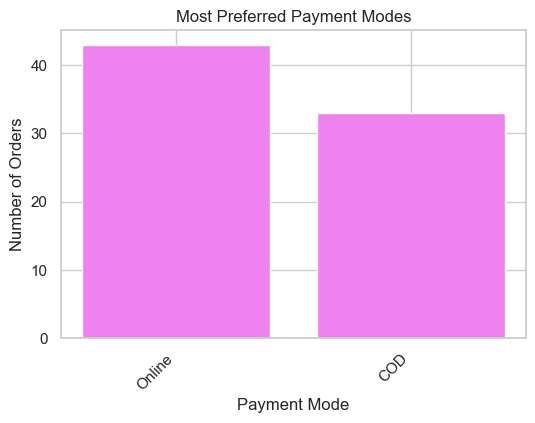

In [204]:
# Group by 'payment_mode' and calculate the total count of orders for each mode
payment_mode_counts = order_df.groupby('payment_mode').size().reset_index(name='order_count')

# Sorting the payment modes based on the total count in descending order
sorted_payment_modes = payment_mode_counts.sort_values(by='order_count', ascending=False)

# Visualize the results using a bar plot
plt.figure(figsize=(6, 4))
plt.bar(sorted_payment_modes['payment_mode'], sorted_payment_modes['order_count'], color='violet')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45, ha='right')

# Showing the plot
plt.show()

Online is the most preferred payment mode and COD is the lowest preferred mode of payment.

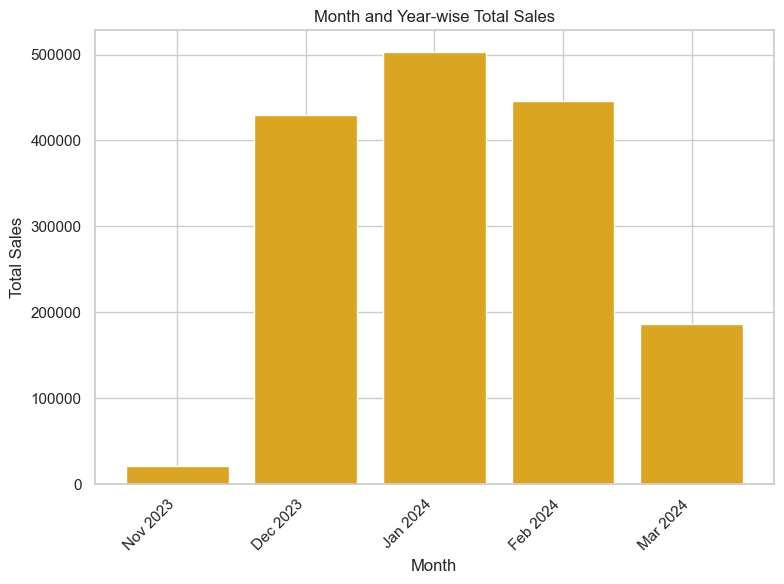

In [118]:
# Extracting the month from the 'order_date' column
order_details_df['order_month'] = order_details_df['order_date'].dt.to_period('M')

# Group by 'order_month' and calculate total sales for each month
monthly_sales = order_details_df.groupby('order_month')['total_price'].sum().reset_index()

# Visualizing the results using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(monthly_sales['order_month'].dt.strftime('%b %Y'), monthly_sales['total_price'], color='goldenrod')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Showing the plot
plt.show()

In Jan 2024, sales is highest with 500000 followed by Feb 2024 with sales in between 400000 to 500000.In Nov 2023 sales is the lowest.

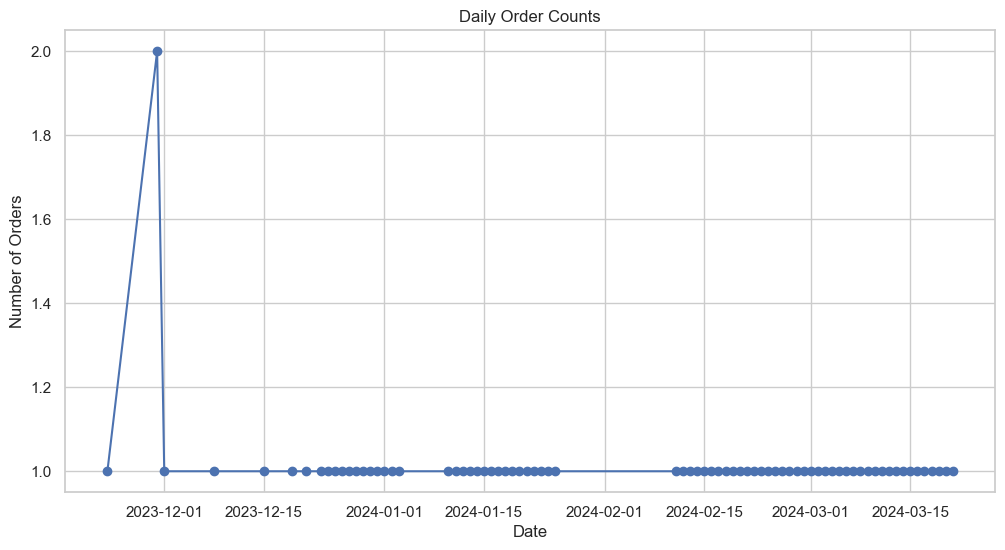

In [120]:
# Extracting date and count of orders for each date
order_counts = order_df['order_date'].dt.date.value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(order_counts.index, order_counts.values, marker='o', linestyle='-', color='b')
plt.title('Daily Order Counts')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)

# Showing the plot
plt.show()

From the plot we can see that on 2023-12-01 most orders were placed.

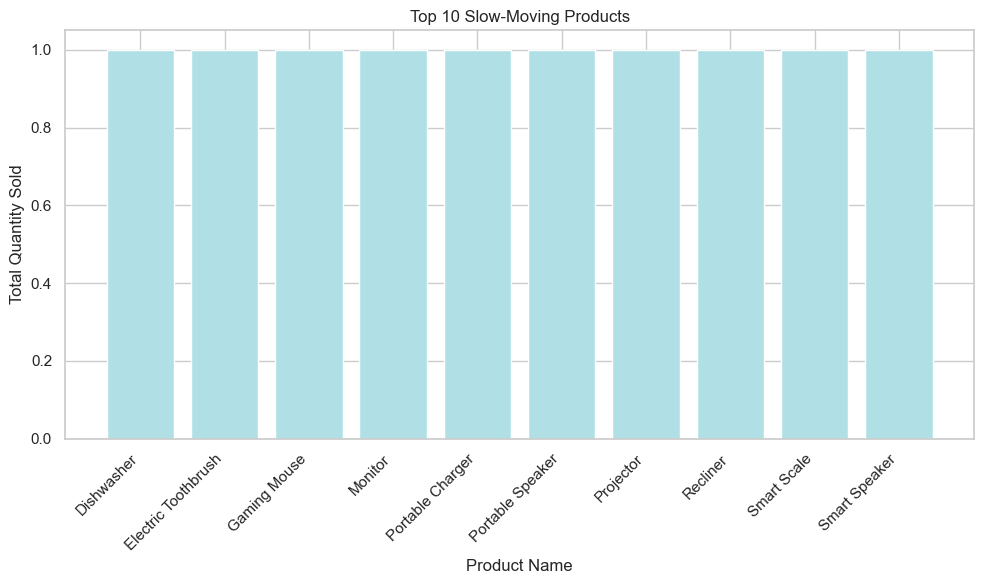

Slow-Moving Products:
           product_name  quantity
10           Dishwasher       1.0
11  Electric Toothbrush       1.0
15         Gaming Mouse       1.0
20              Monitor       1.0
21     Portable Charger       1.0
22     Portable Speaker       1.0
24            Projector       1.0
25             Recliner       1.0
27          Smart Scale       1.0
28        Smart Speaker       1.0


In [210]:
#Group by 'product_name' and calculate total quantity sold for each product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify the slow-moving products 
slow_moving_products = product_quantity.nsmallest(10, 'quantity')

# Visualize the results using a bar plot
plt.figure(figsize=(10,6))
plt.bar(slow_moving_products['product_name'], slow_moving_products['quantity'], color='powderblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the slow-moving products
print('Slow-Moving Products:')
print(slow_moving_products[['product_name', 'quantity']])

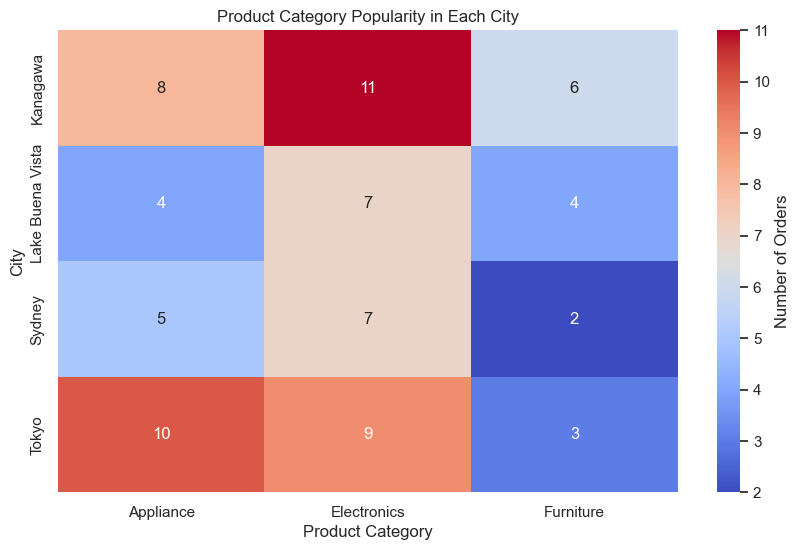

In [127]:
# Merge order_df, cust_df, and product_df to create a comprehensive DataFrame
merged_df = pd.merge(order_df, cust_df, on='customer_id')
merged_df = pd.merge(merged_df, product_df, on='product_id')

# Create a pivot table to count the number of orders for each product category in each city
pivot_table = pd.pivot_table(merged_df, values='order_id', index='city', columns='category', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Number of Orders'})
plt.title('Product Category Popularity in Each City')
plt.xlabel('Product Category')
plt.ylabel('City')
plt.show()

Electronics has the highest number of order in the city Kanagawa.Appliance category has 10 orders in Tokyo.
Least orders are for the category 'Furniture' in Tokyo and Sydney.

Conclusion

The analysis reveals significant insights into customer behavior, product popularity, and order dynamics. Tokyo emerges as a major market, with 'Electronics' dominating sales. Understanding customer preferences, stock levels, and payment choices can guide strategic decisions for inventory management, marketing, and customer retention. The observed trends over time and across regions provide valuable insights for future planning and optimization.